# Part 1

In [1]:
# Importing libraries 
from bs4 import BeautifulSoup as bs
import pandas as pd
import csv
import requests
import matplotlib.pyplot as plt

# Closing all the plots opened in the temp space 
plt.close('all')

# Defining the url from which scraping is to be done
url="https://my.gwu.edu/mod/pws/courses.cfm?campId=1&termId=201903&subjId=DNSC"


In [2]:
# Using requests method to get the contents of url
r = requests.get(url)

# Get the content in the text format and save it in data
data = r.text    

# Using BS library, parse the data using html pareser
soup = bs(data, "html.parser")

# Print the soup object that contains all the content
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html dir="ltr" lang="en" version="XHTML+RDFa 1.0" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://ogp.me/ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:sioc="http://rdfs.org/sioc/ns#" xmlns:sioct="http://rdfs.org/sioc/types#" xmlns:skos="http://www.w3.org/2004/02/skos/core#" xmlns:xsd="http://www.w3.org/2001/XMLSchema#">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <link href="/layout/uwp_basic/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
   <meta content="George washington university, gwu, gw, gw univers

In [3]:
# Using inspect element in the browser, we find that all the content are in the class where the key is 'align' and value is 'center'
# Using soup's findAll method to find all the rows with above properties
allRows = soup.findAll('tr',{'align':'center'})

# Making an empty list to store the values
tableData = []

# Using loop to go through all the rows one by one and pick out value in each cell
for row in allRows:
    eachRow = []
    cells = row.findAll('td')
    for cell in cells:
        # eachRow.append(cell.getText()) # This gave everything including tags
        # eachRow.append(cell.text.strip()) # this one has unicode
        eachRow.append(str(cell.text.strip()))
    # eachRow[2] = eachRow[2][:4]    # Without this there is some noise out there
    tableData.append(eachRow)


In [4]:
# Printing the list of list of values
tableData

[['STATUS',
  'CRN',
  'SUBJECT',
  'SECT',
  'COURSE',
  'CREDIT',
  'INSTR.',
  'BLDG/RM',
  'DAY/TIME',
  'FROM / TO',
  ''],
 ['OPEN',
  '96259',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t1001',
  '10',
  'Business Analytics I: Statistics for Descriptive and Predictive Analytics',
  '3.00',
  'Prasad, S',
  'DUQUES 254',
  'TR11:10AM - 12:25PM',
  '08/26/19 - 12/09/19',
  ''],
 ['OPEN',
  '96260',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t2001',
  '10',
  'Business Analytics II: Predictive and Prescriptive Analytics',
  '3.00',
  'Prasad, S',
  'ROME 204',
  'TR02:20PM - 03:35PM',
  '08/26/19 - 12/09/19',
  ''],
 ['OPEN',
  '96261',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t4211',
  '10',
  'Programming for Analytics',
  '3.00',
  'Kanungo, S',
  'GELM B04',
  'TR11:10AM - 12:25PM',
  '08/26/19 - 12/09/19',
  ''],
 ['OPEN',
  '95315',
  'DNSC\n\t\t\t\n\n\n\t\t\t\t\t4404',
  '10',
  'Essentials of Project Management',
  '3.00',
  'Khamooshi, H',
  'GOV 102',
  'R03:30PM - 06:00PM',
  '08/26/19 - 12/09/19',
  ''],
 

In [5]:
# Seeing the headers
tableData[0]

['STATUS',
 'CRN',
 'SUBJECT',
 'SECT',
 'COURSE',
 'CREDIT',
 'INSTR.',
 'BLDG/RM',
 'DAY/TIME',
 'FROM / TO',
 '']

In [6]:
# Saving the data in a csv file in local directory
with open ('DNSC_Courses.csv','w') as file:
   writer = csv.writer(file)
   for row in tableData:
      writer.writerow(row)
file.close

<function TextIOWrapper.close>

# Part 2

In [7]:
# Loading the data in a pandas dataframe
data = pd.read_csv("DNSC_Courses.csv") 
data.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,Unnamed: 10
0,OPEN,96259,DNSC\r\n\t\t\t\r\n\r\n\r\n\t\t\t\t\t1001,10,Business Analytics I: Statistics for Descripti...,3.0,"Prasad, S",DUQUES 254,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
1,OPEN,96260,DNSC\r\n\t\t\t\r\n\r\n\r\n\t\t\t\t\t2001,10,Business Analytics II: Predictive and Prescrip...,3.0,"Prasad, S",ROME 204,TR02:20PM - 03:35PM,08/26/19 - 12/09/19,NaN
2,OPEN,96261,DNSC\r\n\t\t\t\r\n\r\n\r\n\t\t\t\t\t4211,10,Programming for Analytics,3.0,"Kanungo, S",GELM B04,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
3,OPEN,95315,DNSC\r\n\t\t\t\r\n\r\n\r\n\t\t\t\t\t4404,10,Essentials of Project Management,3.0,"Khamooshi, H",GOV 102,R03:30PM - 06:00PM,08/26/19 - 12/09/19,NaN
4,OPEN,97612,DNSC\r\n\t\t\t\r\n\r\n\r\n\t\t\t\t\t4900,10,Text Analytics,3.0,"Prasad, S",DUQUES 350,TR12:45PM - 02:00PM,08/26/19 - 12/09/19,NaN


### We have a lot of erroneous data in the form of \n, \t and \r that we have to remove from the values in Subject column.

In [8]:
# Removing \n from Subject column
data['SUBJECT'] = data['SUBJECT'].str.replace("\n","")
data.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,Unnamed: 10
0,OPEN,96259,DNSC\r\t\t\t\r\r\r\t\t\t\t\t1001,10,Business Analytics I: Statistics for Descripti...,3.0,"Prasad, S",DUQUES 254,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
1,OPEN,96260,DNSC\r\t\t\t\r\r\r\t\t\t\t\t2001,10,Business Analytics II: Predictive and Prescrip...,3.0,"Prasad, S",ROME 204,TR02:20PM - 03:35PM,08/26/19 - 12/09/19,NaN
2,OPEN,96261,DNSC\r\t\t\t\r\r\r\t\t\t\t\t4211,10,Programming for Analytics,3.0,"Kanungo, S",GELM B04,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
3,OPEN,95315,DNSC\r\t\t\t\r\r\r\t\t\t\t\t4404,10,Essentials of Project Management,3.0,"Khamooshi, H",GOV 102,R03:30PM - 06:00PM,08/26/19 - 12/09/19,NaN
4,OPEN,97612,DNSC\r\t\t\t\r\r\r\t\t\t\t\t4900,10,Text Analytics,3.0,"Prasad, S",DUQUES 350,TR12:45PM - 02:00PM,08/26/19 - 12/09/19,NaN


In [10]:
# Removing \t from Subject column
data['SUBJECT'] = data['SUBJECT'].str.replace("\t","")
data.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,Unnamed: 10
0,OPEN,96259,DNSC\r\r\r\r1001,10,Business Analytics I: Statistics for Descripti...,3.0,"Prasad, S",DUQUES 254,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
1,OPEN,96260,DNSC\r\r\r\r2001,10,Business Analytics II: Predictive and Prescrip...,3.0,"Prasad, S",ROME 204,TR02:20PM - 03:35PM,08/26/19 - 12/09/19,NaN
2,OPEN,96261,DNSC\r\r\r\r4211,10,Programming for Analytics,3.0,"Kanungo, S",GELM B04,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
3,OPEN,95315,DNSC\r\r\r\r4404,10,Essentials of Project Management,3.0,"Khamooshi, H",GOV 102,R03:30PM - 06:00PM,08/26/19 - 12/09/19,NaN
4,OPEN,97612,DNSC\r\r\r\r4900,10,Text Analytics,3.0,"Prasad, S",DUQUES 350,TR12:45PM - 02:00PM,08/26/19 - 12/09/19,NaN


In [11]:
# Removing \r from Subject column
data['SUBJECT'] = data['SUBJECT'].str.replace("\r","")
data.head()

,STATUS,CRN,SUBJECT,SECT,COURSE,CREDIT,INSTR.,BLDG/RM,DAY/TIME,FROM / TO,Unnamed: 10
0,OPEN,96259,DNSC1001,10,Business Analytics I: Statistics for Descripti...,3.0,"Prasad, S",DUQUES 254,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
1,OPEN,96260,DNSC2001,10,Business Analytics II: Predictive and Prescrip...,3.0,"Prasad, S",ROME 204,TR02:20PM - 03:35PM,08/26/19 - 12/09/19,NaN
2,OPEN,96261,DNSC4211,10,Programming for Analytics,3.0,"Kanungo, S",GELM B04,TR11:10AM - 12:25PM,08/26/19 - 12/09/19,NaN
3,OPEN,95315,DNSC4404,10,Essentials of Project Management,3.0,"Khamooshi, H",GOV 102,R03:30PM - 06:00PM,08/26/19 - 12/09/19,NaN
4,OPEN,97612,DNSC4900,10,Text Analytics,3.0,"Prasad, S",DUQUES 350,TR12:45PM - 02:00PM,08/26/19 - 12/09/19,NaN


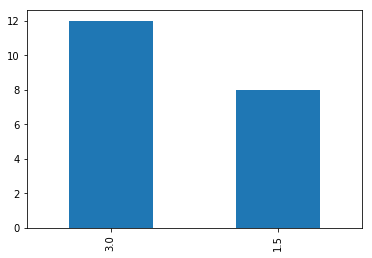

In [16]:
# Plotting a bar graph of 'CREDIT' column
data['CREDIT'].value_counts().plot(kind='bar')
plt.show()


### We see that 3 credits are more than that of 1.5 credits courses. First page of the url had around 12 - 3 cr courses and 8 - 1.5 cr courses.